In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

In [2]:
data = pd.read_csv('questions.csv')
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
data.shape

(404351, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
data.describe()

,id,qid1,qid2,is_duplicate
count,404351.000000,404351.000000,404351.000000,404351.000000
mean,202175.000000,391840.987691,390195.973765,0.369248
std,116726.223686,228430.857607,228803.645742,0.482602
min,0.000000,1.000000,2.000000,0.000000
25%,101087.500000,193381.000000,191012.000000,0.000000
50%,202175.000000,390630.000000,388364.000000,0.000000
75%,303262.500000,589514.000000,588071.000000,1.000000
max,404350.000000,789800.000000,789801.000000,1.000000


In [6]:
data.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
df = data.sample(30000)

In [9]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
138688,138688,274551,196758,How much money is the Mona Lisa painting worth?,Artwork: What is the Mona Lisa worth?,1
8487,8487,16952,16953,Is the Government of Pakistan encouraging Indi...,Is Government of India encouraging Pakistan by...,0
39100,39100,77894,77895,What is the political system in India?,What is wrong with the Indian political system...,0
3674,3674,7346,7347,What's the average conversion rate for online ...,What is the average conversion rate of e-comme...,1
286288,286288,562624,562625,How is a German Shepherd/Pomeranian mix bred?,What is the temperament of a Shepherd/Terrier ...,0


In [10]:
df.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df = df.dropna()

In [13]:
df.shape

(30000, 6)

In [14]:
df['is_duplicate'].value_counts()

is_duplicate
0    18941
1    11059
Name: count, dtype: int64

# Feature Engineering

In [15]:
import nltk
import gensim
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score

In [60]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhask\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhask\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhask\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Question Length
df['q1_len'] = df['question1'].str.len() 
df['q2_len'] = df['question2'].str.len()

In [17]:
# Number of Words
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

In [18]:
# Common Words
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

df['word_common'] = df.apply(common_words, axis=1)

In [19]:
# Total Words
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

df['word_total'] = df.apply(total_words, axis=1)

In [20]:
# Word Share
df['word_share'] = round(df['word_common']/df['word_total'],2)

In [21]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
138688,138688,274551,196758,How much money is the Mona Lisa painting worth?,Artwork: What is the Mona Lisa worth?,1,47,37,9,7,5,16,0.31
8487,8487,16952,16953,Is the Government of Pakistan encouraging Indi...,Is Government of India encouraging Pakistan by...,0,107,103,16,15,15,31,0.48
39100,39100,77894,77895,What is the political system in India?,What is wrong with the Indian political system...,0,38,153,7,26,7,29,0.24
3674,3674,7346,7347,What's the average conversion rate for online ...,What is the average conversion rate of e-comme...,1,67,56,10,9,4,19,0.21
286288,286288,562624,562625,How is a German Shepherd/Pomeranian mix bred?,What is the temperament of a Shepherd/Terrier ...,0,45,50,7,8,2,15,0.13


In [22]:
# Stop word removal & Lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens
    words = [word for word in words if word.isalpha() and word not in stop_words]
    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    return words

In [23]:
df['question1'] = df['question1'].apply(preprocess_text)
df['question2'] = df['question2'].apply(preprocess_text)

In [24]:
# Corpus
corpus = list(df['question1']) + list(df['question2'])
# Word2Vec Model
wordmodel = gensim.models.Word2Vec(sentences= corpus, vector_size=100, window=10, min_count=2, workers=4,sg=1)

In [25]:
wordmodel.build_vocab(corpus)

In [26]:
# Word2Vec model training | Words Vector 
wordmodel.train(corpus, total_examples=wordmodel.corpus_count, epochs=wordmodel.epochs)

(1462530, 1575525)

In [27]:
len(wordmodel.wv.index_to_key)

13034

In [28]:
# Document Vector
def doc_vec(tokens):
    embeddings = [wordmodel.wv[word] for word in tokens if word in wordmodel.wv.index_to_key]
    if len(embeddings) > 0:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(100)

In [29]:
df['quest1_embed'] = df['question1'].apply(doc_vec)
df['quest2_embed'] = df['question2'].apply(doc_vec)

In [30]:
#Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
quest1embed = np.array(df['quest1_embed'].tolist())
quest2embed = np.array(df['quest2_embed'].tolist())

# Compute cosine similarity between corresponding vectors
cos_similarities = cosine_similarity(quest1embed , quest2embed)


In [31]:
# Add the computed cosine similarities as a new column to the dataset
df['cosine_similarity'] = cos_similarities.diagonal()

In [32]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,quest1_embed,quest2_embed,cosine_similarity
138688,138688,274551,196758,"[much, money, mona, lisa, painting, worth]","[artwork, mona, lisa, worth]",1,47,37,9,7,5,16,0.31,"[-0.54475695, 0.10404124, 0.12773407, 0.041077...","[-0.31738383, 0.15588138, 0.06316766, -0.00355...",0.880572
8487,8487,16952,16953,"[government, pakistan, encouraging, india, tak...","[government, india, encouraging, pakistan, tak...",0,107,103,16,15,15,31,0.48,"[-0.2586813, 0.010931935, -0.1752848, -0.03659...","[-0.2586813, 0.010931943, -0.1752848, -0.03659...",1.000000
39100,39100,77894,77895,"[political, system, india]","[wrong, indian, political, system, environment...",0,38,153,7,26,7,29,0.24,"[-0.40193355, 0.010389864, -0.043636043, -0.25...","[-0.22555615, 0.19187897, 0.104238965, -0.0693...",0.857617
3674,3674,7346,7347,"[average, conversion, rate, online, retail, st...","[average, conversion, rate, site]",1,67,56,10,9,4,19,0.21,"[-0.23789562, 0.468133, -0.04789375, -0.030505...","[-0.022967897, 0.37890118, 0.10621967, -0.0447...",0.920941
286288,286288,562624,562625,"[german, mix, bred]","[temperament, mix]",0,45,50,7,8,2,15,0.13,"[-0.62872434, 0.29149863, -0.2515132, 0.109840...","[-0.21670409, 0.35420007, 0.14131063, -0.04757...",0.833674


In [33]:
pip install wordcloud matplotlib pandas


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/300.2 kB 1.9 MB/s eta 0:00:01
   ------------ --------------------------- 92.2/300.2 kB 1.3 MB/s eta 0:00:01
   ------------------- -------------------- 143.4/300.2 kB 1.4 MB/s eta 0:00:01
   --------------------- ------------------ 163.8/300.2 kB 1.4 MB/s eta 0:00:01
   -------------------------------- ------- 245.8/300.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [35]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(str(corpus))

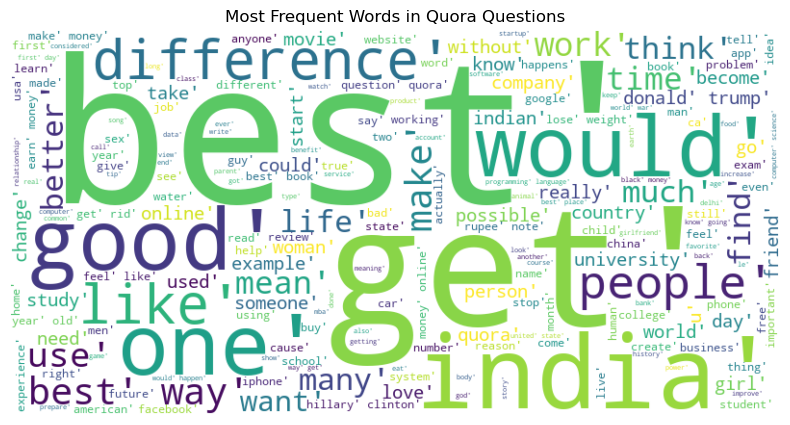

In [36]:

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.title('Most Frequent Words in Quora Questions')
plt.show()

In [37]:
df.drop(columns=['id','qid1','qid2','question1','question2','quest1_embed','quest2_embed'] , inplace=True)

In [38]:
df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cosine_similarity
138688,1,47,37,9,7,5,16,0.31,0.880572
8487,0,107,103,16,15,15,31,0.48,1.000000
39100,0,38,153,7,26,7,29,0.24,0.857617
3674,1,67,56,10,9,4,19,0.21,0.920941
286288,0,45,50,7,8,2,15,0.13,0.833674


In [39]:
x = df.drop(['is_duplicate'], axis = 1)
y = df['is_duplicate']

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)

(24000, 8)
(6000, 8)


In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [42]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier(),
    SVC(),
    KNeighborsClassifier()
]

In [41]:
for model in models:
    # Training Data fiting
    model.fit(x_train, y_train)
    # Predictions
    y_pred = model.predict(x_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Print the name of the model and its accuracy
    print(type(model).__name__, "Accuracy:", accuracy)
    # Confussion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

c:\Users\bhask\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.6585
[[2886  889]
 [1160 1065]]
DecisionTreeClassifier Accuracy: 0.6723333333333333
[[2818  957]
 [1009 1216]]
RandomForestClassifier Accuracy: 0.6993333333333334
[[2876  899]
 [ 905 1320]]
GradientBoostingClassifier Accuracy: 0.7078333333333333
[[2659 1116]
 [ 637 1588]]
XGBClassifier Accuracy: 0.7088333333333333
[[2767 1008]
 [ 739 1486]]
SVC Accuracy: 0.6701666666666667
[[3061  714]
 [1265  960]]
KNeighborsClassifier Accuracy: 0.675
[[2812  963]
 [ 987 1238]]


In [43]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(type(model).__name__, "Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
print(cm)

XGBClassifier Accuracy: 0.7243333333333334
[[2840  969]
 [ 685 1506]]


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.7243
Precision: 0.6085
Recall: 0.6874
F1-Score: 0.6455
Confusion Matrix:
[[2840  969]
 [ 685 1506]]


In [41]:
df.head(2)

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cosine_similarity
82806,1,150,149,34,34,26,53,0.49,1.000000
176964,1,55,63,9,11,6,20,0.30,0.975847


In [42]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))


In [43]:
def quest(q1,q2):
    query = []
    
    #length of strings in both question 
    query.append(len(q1))
    query.append(len(q2))
    
    #words in both questions
    query.append(len(q1.split(" ")))
    query.append(len(q2.split(" ")))
    
    #Common words
    query.append(test_common_words(q1,q2))
    
    #Total Words
    query.append(test_total_words(q1,q2))
    
    #Word Share
    query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    #cosine similarity
    token1 = preprocess_text(q1)
    token2 = preprocess_text(q2)
    vector1 = doc_vec(token1).reshape(1, -1)
    vector2 = doc_vec(token2).reshape(1, -1)
    cos_sim = cosine_similarity(vector1,vector2)[0,0]
    query.append(cos_sim)
    
    return np.array(query).reshape(1,8)

In [44]:
q1 = 'What is the capital of india?'
q2 = 'what is his name?'

In [56]:
model.predict(quest(q1,q2))

array([0])

In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(wordmodel,open('cv.pkl','wb'))